In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

## Load dataset
**1. [1 Point] Download the dataset from elearn and then load it to your notebook.**

In [44]:
df = pd.read_csv("Rice_Cammeo_Osmancik.csv")
df

,ID,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,2,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,3,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,4,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,5,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo
...,...,...,...,...,...,...,...,...,...
3805,3806,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,Osmancik
3806,3807,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,Osmancik
3807,3808,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,Osmancik
3808,3809,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,Osmancik


## Descriptive Analysis and Data Pre-processing
**2. [1 Point] Utilize appropriate functions from suitable libraries to determine if the dataset is balanced?**

In [45]:
df['Class'].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

**3.	[1 Point] Show the information about the dataset including the total number of observations, the total number of attributes and the type of each attribute in this dataset**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3810 non-null   int64  
 1   Area               3809 non-null   float64
 2   Perimeter          3808 non-null   float64
 3   Major_Axis_Length  3809 non-null   float64
 4   Minor_Axis_Length  3808 non-null   float64
 5   Eccentricity       3808 non-null   float64
 6   Convex_Area        3809 non-null   float64
 7   Extent             3810 non-null   float64
 8   Class              3810 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 268.0+ KB


**4.	[1 Point] For feature selection drop any unusable feature from the dataframe**

In [47]:
df = df.drop(columns=['ID'])

**5.	[1 Point] a) Display a count of missing observations in each attribute. b) Remove the observations with missing values.**

In [48]:
df.isnull().sum()

Area                 1
Perimeter            2
Major_Axis_Length    1
Minor_Axis_Length    2
Eccentricity         2
Convex_Area          1
Extent               0
Class                0
dtype: int64

In [49]:
df = df.dropna()

**6.	[1 Point] Create a list that holds the numeric attributes columns’ names.**

In [50]:
numeric_columns = df.select_dtypes(np.number).columns

**7.	[2 Point] Utilize the appropriate function to Show the five-number summary for all numeric attributes**

In [51]:
for column in numeric_columns:  
    print('\n', 'Column:', column, '\n')
    print(df[column].describe())


 Column: Area 

count     3801.000000
mean     12666.944751
std       1732.606672
min       7551.000000
25%      11372.000000
50%      12419.000000
75%      13950.000000
max      18913.000000
Name: Area, dtype: float64

 Column: Perimeter 

count    3801.000000
mean      454.224257
std        35.595402
min       359.100006
25%       426.165008
50%       448.846008
75%       483.657989
max       548.445984
Name: Perimeter, dtype: float64

 Column: Major_Axis_Length 

count    3801.000000
mean      188.774025
std        17.446952
min       145.264465
25%       174.358124
50%       185.801941
75%       203.523453
max       239.010498
Name: Major_Axis_Length, dtype: float64

 Column: Minor_Axis_Length 

count    3801.000000
mean       86.309194
std         5.733743
min        59.532406
25%        82.721268
50%        86.428650
75%        90.133011
max       107.542450
Name: Minor_Axis_Length, dtype: float64

 Column: Eccentricity 

count    3801.000000
mean        0.886881
std         0.0

**8.	 [6 Points] a) Show the correlation table. b) Use appropriate plots to show the relationship between every two numeric columns in the dataset, with each data point coloured according to the class attribute. (Make sure plots have a title, xlabel and ylabel).**

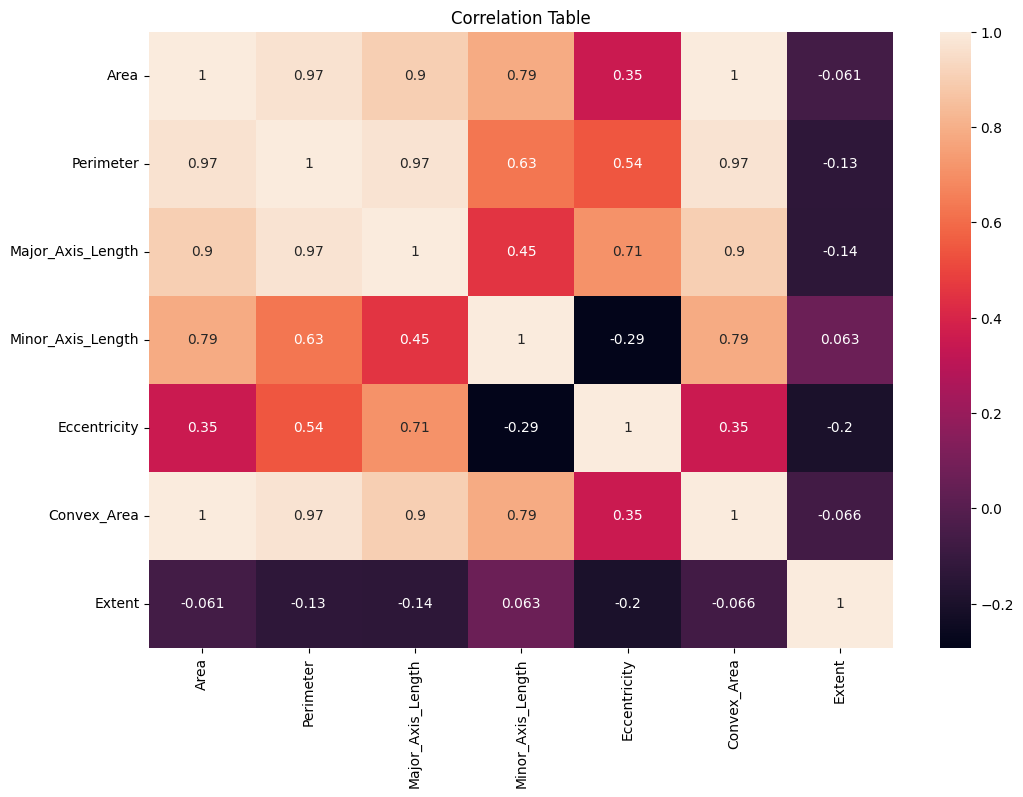

In [52]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
dataplot = sns.heatmap(corr, annot=True)
plt.title('Correlation Table')
plt.show()

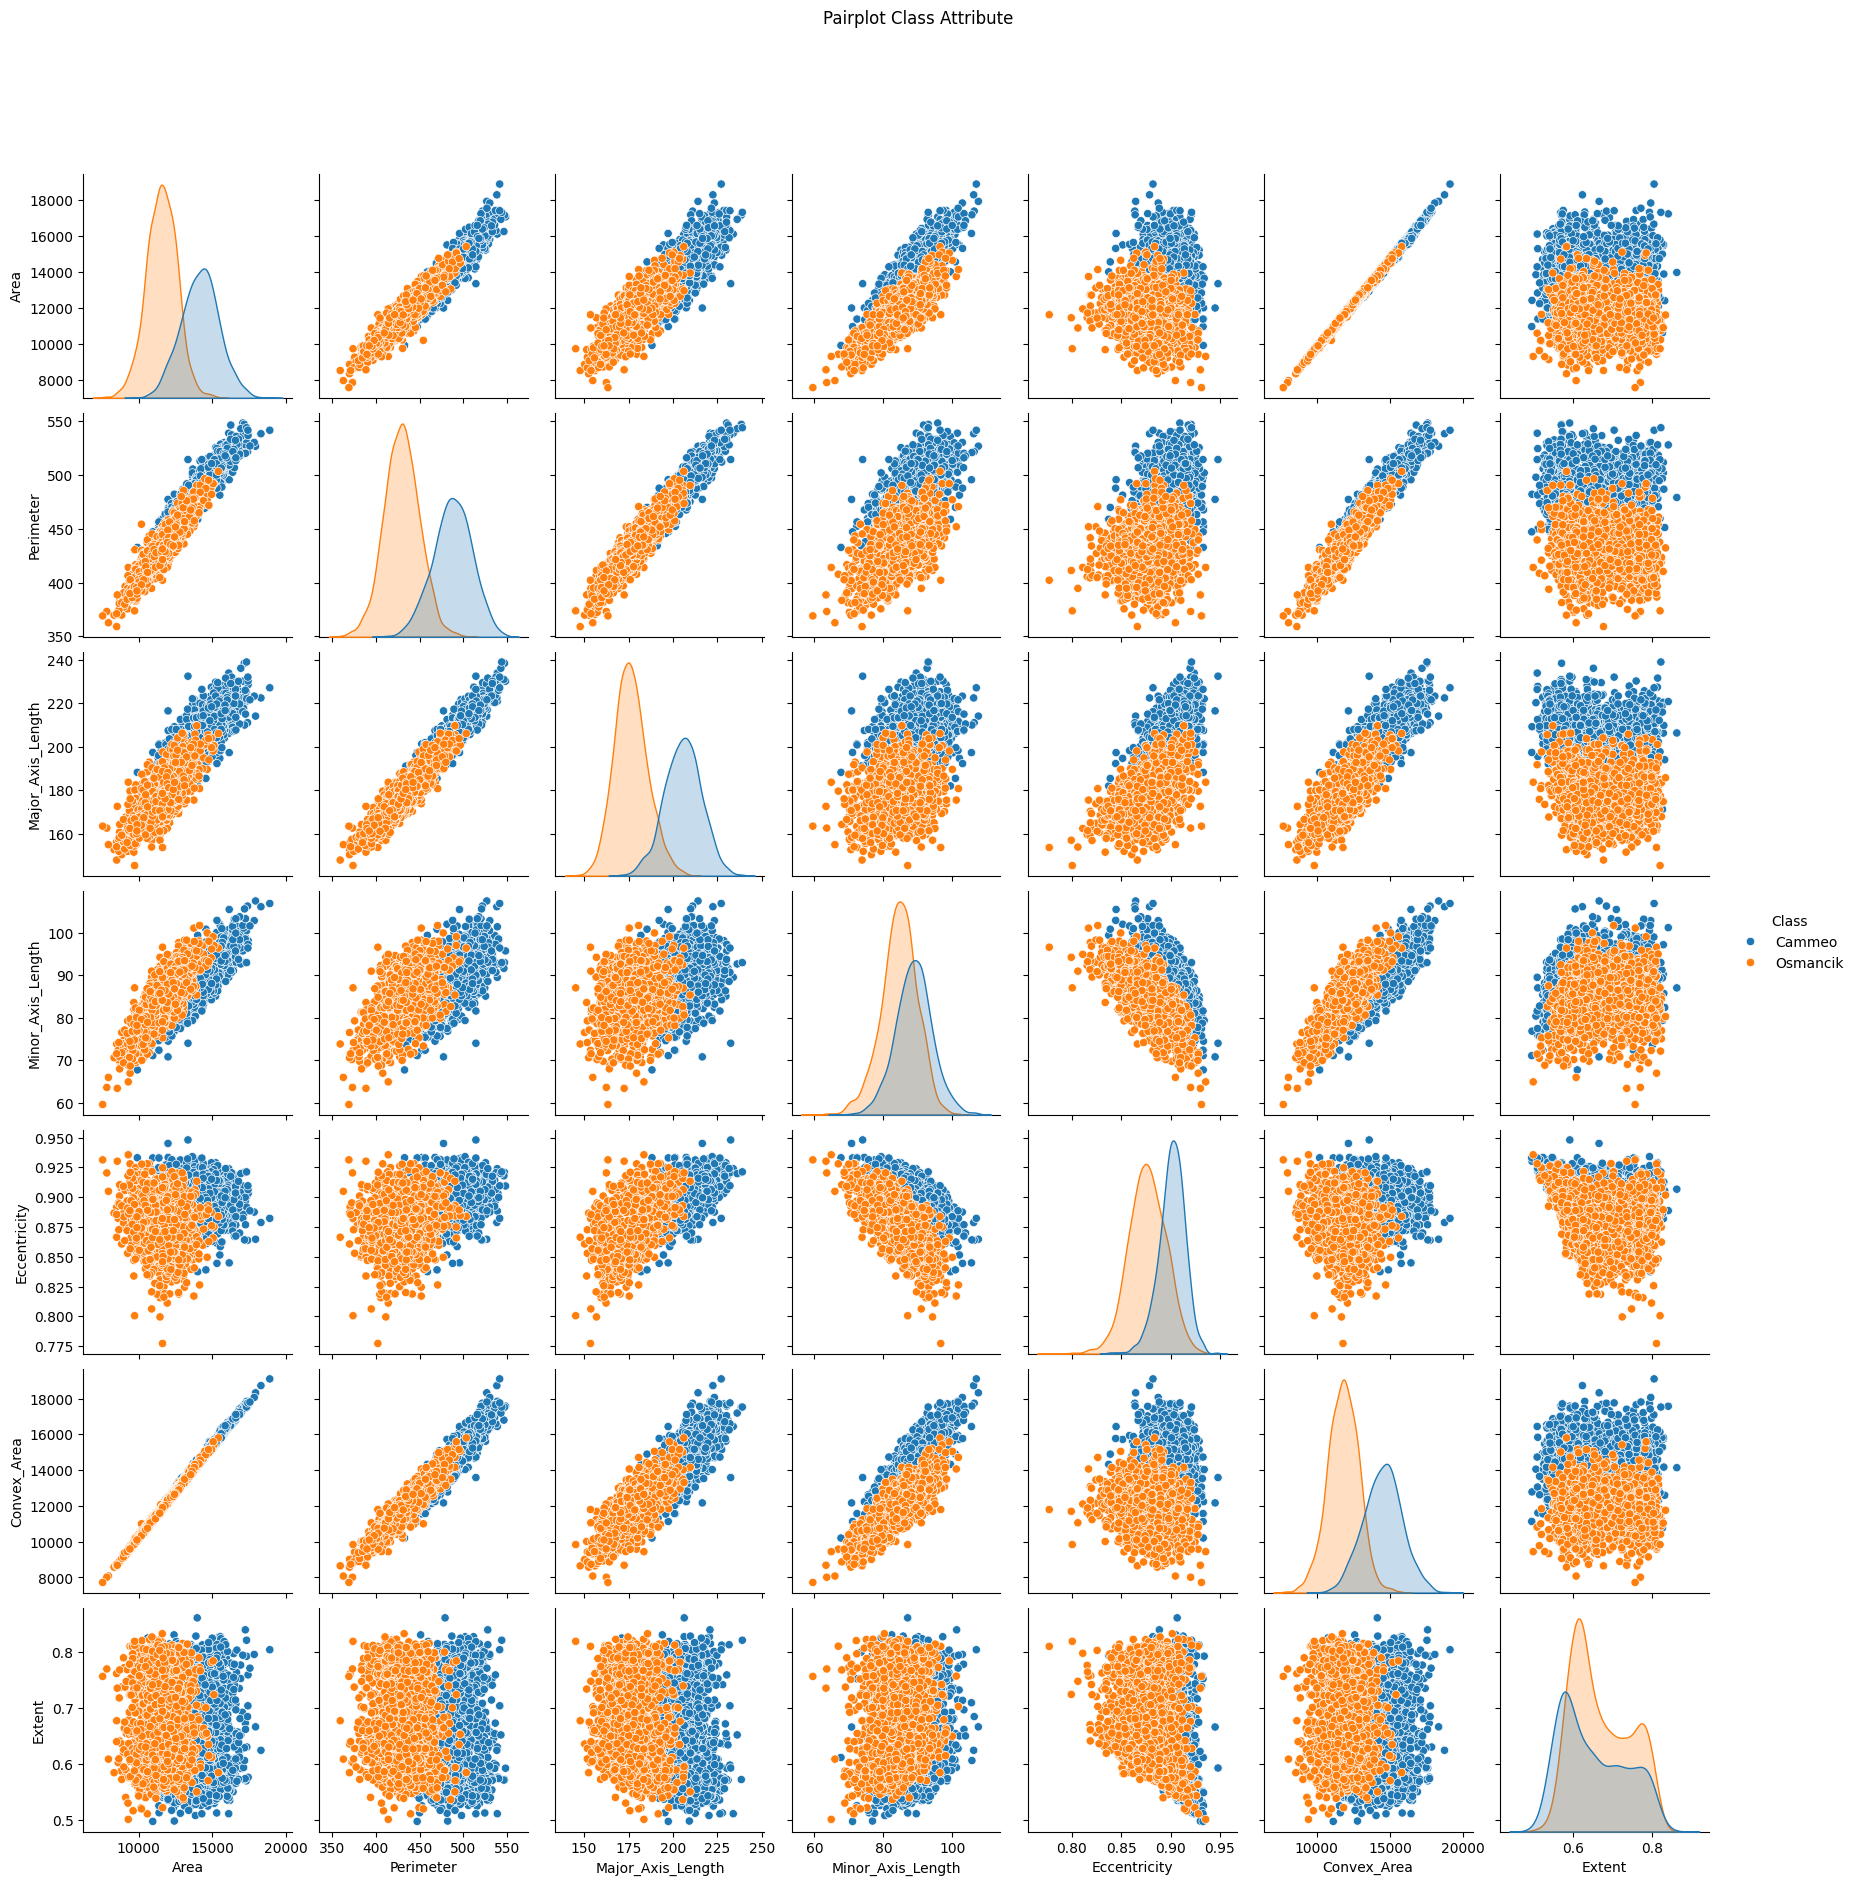

In [58]:
plt
sns.pairplot(df, hue="Class")
plt.suptitle('Pairplot Class Attribute', y=1.08)
plt.show()

**9.	[2 Points] a) Show the distribution of the ‘Area’ for the ‘Cammeo’ class and the ‘Osmancik’ class separately. b) Point out the differences between the two histograms.**

<Axes: >

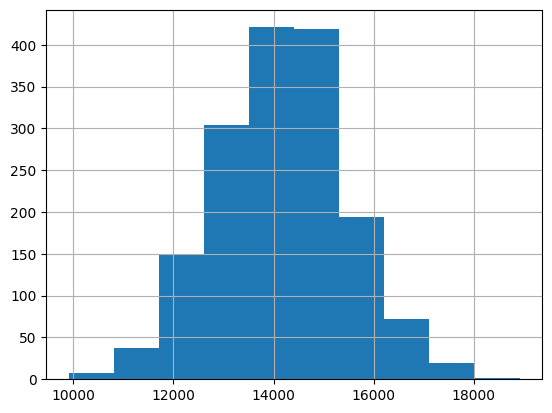

In [68]:
df.Area[df.Class == 'Cammeo'].hist()

<Axes: >

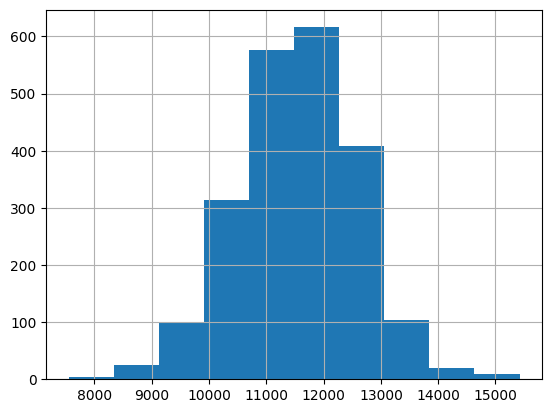

In [69]:
df.Area[df.Class == 'Osmancik'].hist()

Class
Cammeo      Axes(0.125,0.11;0.775x0.77)
Osmancik    Axes(0.125,0.11;0.775x0.77)
Name: Area, dtype: object

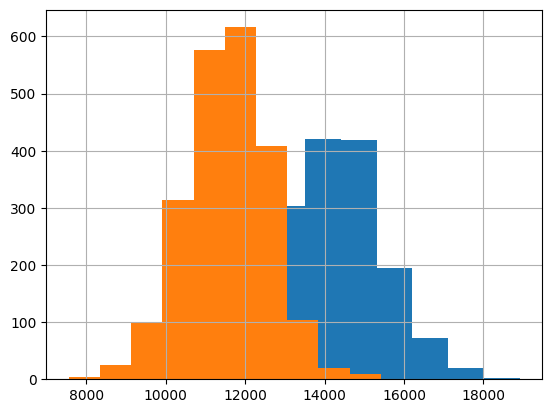

In [62]:
df.groupby("Class").Area.hist()

The mean of Osmancik class is less than the mean of Cammeo class

**10.	[6 Points] a) Use appropriate visualization to identify all attribute that has outliers and all the attributes with no outliers. b) Use an appropriate way to scale the data and redo the visualization**

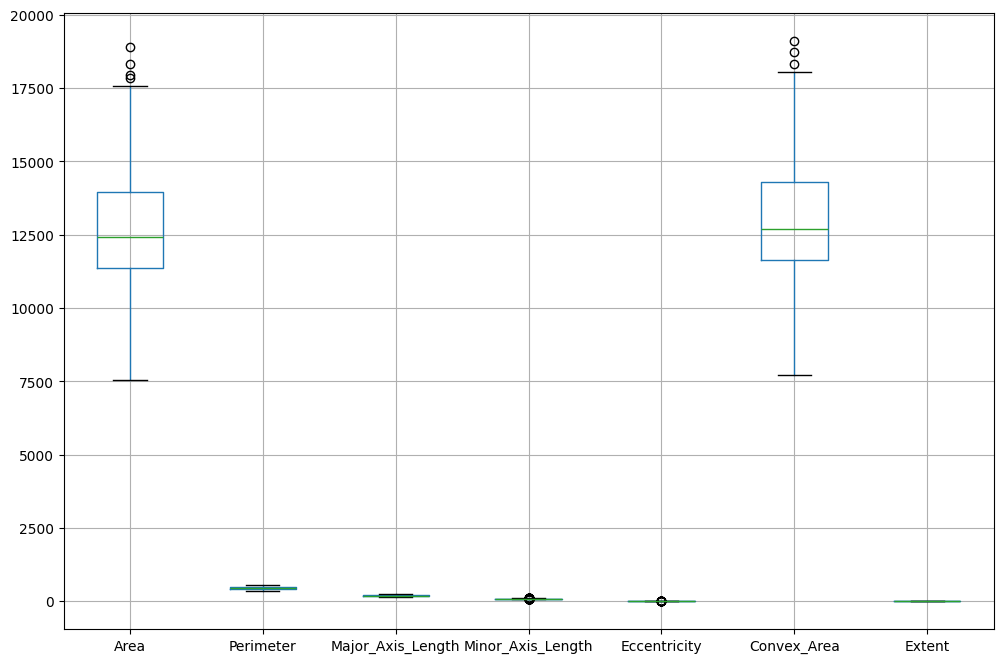

In [75]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.show()

In [79]:
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

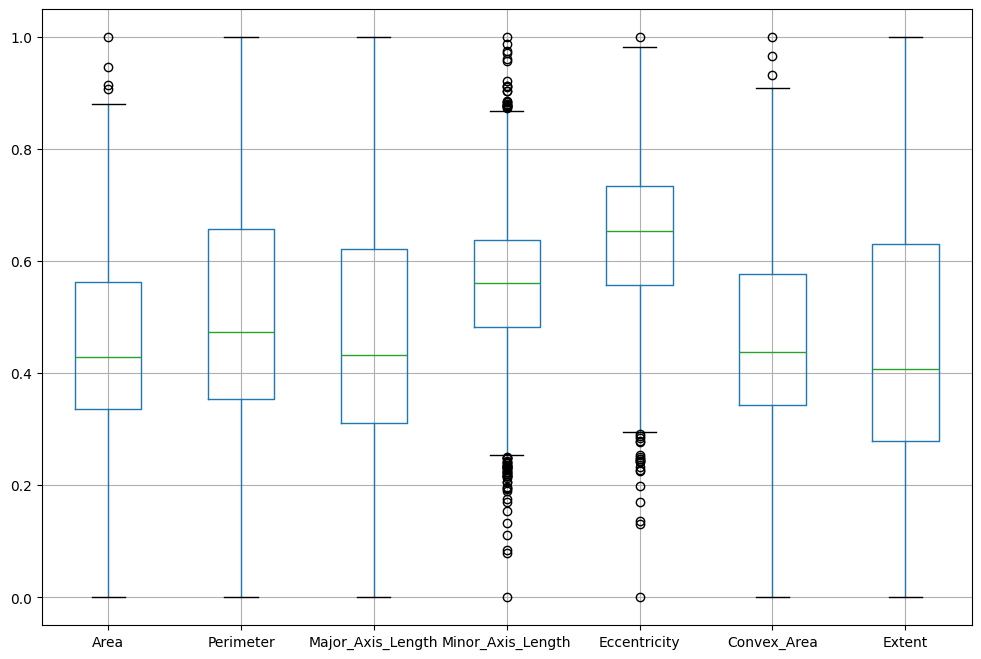

In [80]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.show()

**11.	[2 Points] Perform appropriate preprocessing techniques on the categorical attribute(s) in the dataset.**

In [82]:
categ_cols = df.select_dtypes(exclude="number").columns.to_list()
classes = dict()
le = LabelEncoder()
for col in categ_cols:
    df[col]= le.fit_transform(df[col])
    classes[col] = le.classes_

## Multivariate Data Analysis (Classification)
**12.	[6 Points] Perform multivariate data analysis for classification using the following steps for the k nearest neighbor.**
* a.	Create feature (X) of the scaled data and target (y)
* b.	Split the dataset into a training set (70%) and testing set (30%), set random_state to 42. Each set (training and test) should contain approximately the same percentage of samples of each target class as the complete set. 
* c.	Run the Knn classifier with one neighbor 
* d.	Print a classification report.
* e.	Write a conclusion (in 2 sentences) summarizing the most important finding of this task.

In [83]:
target = "Class"
X = df.drop(target, axis=1)
y = df[target]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# Initialize the KNN classifier with k=1
knn = KNeighborsClassifier(n_neighbors=1)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

In [86]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8843120070113936
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       512
           1       0.89      0.90      0.90       629

    accuracy                           0.88      1141
   macro avg       0.88      0.88      0.88      1141
weighted avg       0.88      0.88      0.88      1141

Confusion Matrix:
 [[442  70]
 [ 62 567]]


A model has been created with KNN Classifier, which resulted in an accuracy of 88%. The model classifies the two different classes Cammeo & Osmancik. The created model classified using one nearest neighbor.

## BONUS 
**13.	[BONUS 10 Points] Grid Search is a method used to find optimal hyperparameters that result in the highest prediction accuracy for a model.**
* a.	Apply [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classification on the sets you have prepared for the previous question. 
* b.	Apply [Grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best hyperparameter for the logistic regression model. 
* c.	Print a classification report of the best LR model
* d.	Compare the results of LR model and Knn model (in short)

In [93]:
lr_model = LogisticRegression(max_iter=1000) 
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       512
           1       0.92      0.95      0.94       629

    accuracy                           0.93      1141
   macro avg       0.93      0.93      0.93      1141
weighted avg       0.93      0.93      0.93      1141



In [94]:
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000] 
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Best parameters found by GridSearchCV: {'C': 10, 'max_iter': 1000, 'solver': 'liblinear'}


In [95]:
best_lr_model = grid_search.best_estimator_

y_pred_best_lr = best_lr_model.predict(X_test)

print(classification_report(y_test, y_pred_best_lr))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       512
           1       0.92      0.96      0.94       629

    accuracy                           0.93      1141
   macro avg       0.93      0.93      0.93      1141
weighted avg       0.93      0.93      0.93      1141



Logistic Regression (93%) outperforms KNN (88%) in terms of accuracy by about 5%.